# LGE - SNU AI Scientist 고급과정 [확률통계 및 통계 방법론]
## 4장: 데이터 기반 추론 1
### TA: 홍현경(hyungyeong81@snu.ac.kr)

# 1. 구간추정

- 신뢰수준 (Confidence level)이 $100(1-\alpha)\%$인 신뢰구간 $(L, U)$는 다음을 만족한다.

$$
P(L \le \theta \le U) = 1 - \alpha
$$


- 모분산 $\sigma^2$를 알 때 정규모집단의 모평균 $\mu$의 신뢰수준 $100(1-\alpha)\%$인 신뢰구간은 다음과 같다.

$$
\left(
\bar{X} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}},
\;
\bar{X} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}
\right)
$$


(구간추정 실습)

이 실습에서는 정규분포를 따르는 모집단에서 반복 표본추출을 수행하고, 각 표본으로부터 계산한 95% 신뢰구간이 모평균 $\mu$를 포함하는지 여부를 시각적으로 확인한다. 이를 통해 신뢰구간의 95% 라는 의미를 직관적으로 이해한다.

- 평균 $\mu = 50$, 표준편차 $\sigma = 10$인 정규분포를 따르는 모집단을 가정한다.
- 표본 크기는 $n = 25$로 고정한다.
- 서로 독립적인 표본추출을 20번 반복하여 각 표본의 표본평균을 계산한다. 이 때, 정규모집단을 가정하므로, 각 반복에서 표본을 직접 생성해 평균을 계산하는 대신, 표본평균이 따르는 분포 $N(\mu,\sigma^2/n)$에서 표본평균을 직접 생성하는 방법을 고려할 수 있다.
- 모표준편차 $\sigma$가 알려져 있으므로, 정규분포 기반의 신뢰구간
  $$
  \bar{X} \pm z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}
  $$
  을 사용하여 각 표본에 대한 95% 신뢰구간을 계산한다.
- 각 신뢰구간이 실제 모평균 $\mu$를 포함하는지 여부를 확인한다.
- 신뢰구간을 수평선으로 시각화하되,
  - $\mu$를 포함하는 경우는 노란색 실선
  - 포함하지 않는 경우는 빨간색 점선
  으로 구분한다.
- 각 표본평균은 점으로 표시하고, 실제 모평균 $\mu$는 수직선으로 나타낸다.

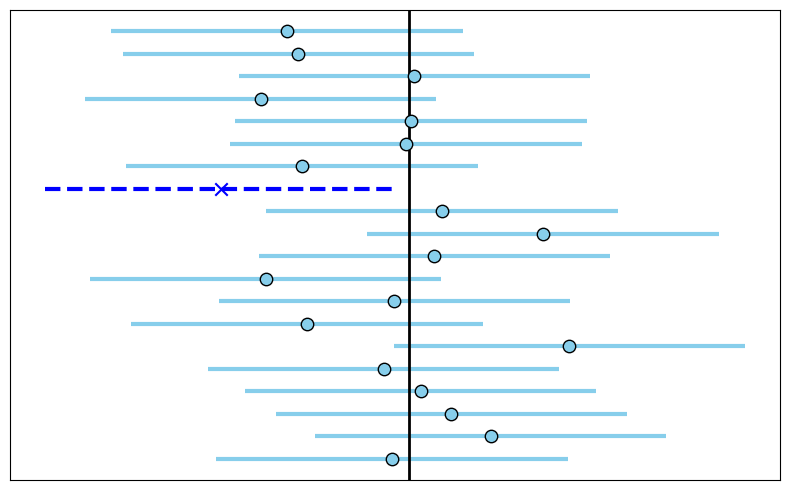

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(81)
mu = 50
sigma = 10
n = 25
alpha = 0.05
z = 1.96
num_samples = 20

# 표본평균 생성
xbar = np.random.normal(mu, sigma / np.sqrt(n), num_samples)

# 신뢰구간 계산
half_len = z * sigma / np.sqrt(n)
lower = xbar - half_len
upper = xbar + half_len
contains = (lower <= mu) & (upper >= mu)

# 시각화
fig, ax = plt.subplots(figsize=(8, 5))

y_positions = np.arange(num_samples)[::-1]

ax.hlines(y_positions[contains], lower[contains], upper[contains], color='skyblue', linewidth=3)
ax.hlines(y_positions[~contains], lower[~contains], upper[~contains], color='blue', linewidth=3, linestyles='--')

ax.scatter(xbar[contains], y_positions[contains], color='skyblue', edgecolors='black', s=80, zorder=3)
ax.scatter(xbar[~contains], y_positions[~contains], color='blue', s=80, marker='x', zorder=3)

ax.axvline(mu, color='black', linewidth=2)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

따라서, 100번의 표본 추출을 통해 얻어진 100개의 신뢰구간  
$$\left(
\bar{X} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}},
\;
\bar{X} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}
\right)$$ 에서, $100(1-\alpha)\%$ 개 정도의 신뢰구간이 모평균 $\mu$를 포함한다고 해석할 수 있다.

# 2. 부트스트래핑(Bootstrapping)

(부트스트래핑 예제 1)

- 본 실습은 강의에서 다룬 표본분포 개념을 실제 MLB 투구 데이터에 적용하여 확인하는 것을 목표로 한다. 특히, 스트라이크존 경계 근처에 위치한 판정이 애매한 투구들에 대하여, 하나의 표본으로부터 계산된 표본비율이 얼마나 변동할 수 있는지를 부트스트래핑을 통해 살펴본다.

- 본 실습의 궁극적인 관심 대상은 스트라이크존 경계 투구에 대해 심판의 판정이 ABS 판정과 일치할 확률
$$
\theta = P(\text{심판 판정이 ABS와 일치})
$$
이다. 이를 추정하기 위해, 2024년 4월 1일부터 4월 7일까지의 MLB 경기에서 관측된 스트라이크존 경계 근처 투구들을 하나의 표본으로 사용한다. 이 기간 동안 관측된 판정이 애매한 투구의 총 개수를 $N$이라 하자.

- 각 투구에 대해 ABS 판정을 기준으로 사람 심판의 판정이 일치하면 정답(1), 불일치하면 오답(0)으로 기록하며, 이를 $X_1, X_2, \dots, X_N$으로 나타낸다. 이때 각 $X_i$는 확률 $\theta$를 갖는 베르누이 확률변수의 관측치로 해석할 수 있다.

- 표본으로부터 계산되는 표본비율
$$
{\hat \theta} = \frac{1}{N}\sum_{i=1}^N X_i
$$
은 심판 판정 정확도 $\theta$의 추정량이다. 그러나 실제로 동일한 조건에서 새로운 투구를 반복 관측하는 것은 불가능하므로, 본 실습에서는 관측된 데이터 $\{X_1,\dots,X_N\}$를 기반으로 추정량의 변동성을 살펴보기 위해 부트스트랩 방법을 사용한다.

- 구체적으로, 관측된 데이터로부터 동일한 크기($n$)의 표본을 $B = 2000$번 복원추출하여 부트스트랩 표본을 반복적으로 생성하고, 각 부트스트랩 표본에 대해 표본비율
$$
\hat{\theta}^* = \frac{1}{n}\sum_{i=1}^{n} X_i^*
$$
을 계산한다. 이러한 과정을 여러 번 반복하여 얻어진 $\hat{\theta}^*$들의 분포를 표본비율 추정량의 부트스트랩 분포라고 한다.

- 이제 우리는 부트스트랩 표본들로부터 계산된 표본비율들의 분포를 히스토그램으로 시각화함으로써, 표본비율 추정량이 가지는 변동성과 분포의 형태를 데이터 기반으로 직관적으로 이해하고자 한다.

**(참고: 배경지식)**
- ABS 판정은 다음 규칙을 따른다.

  - 공의 중심 좌표는 $(plate\_x, plate\_z)$이다.
  - 타자별 스트라이크존 상단과 하단은 $sz\_top$, $sz\_bot$이다.
  - 공의 일부라도 스트라이크존과 겹치면 스트라이크로 판정한다.

- 수평 방향 조건은 다음과 같다.

$$
|plate\_x| \le \frac{17/2}{12} + \frac{1.43}{12}
$$

- 수직 방향 조건은 다음과 같다.

$$
sz\_bot - \frac{1.43}{12}
\le plate\_z \le
sz\_top + \frac{1.43}{12}.
$$

- 본 실습에서는 판정이 가장 어려운 상황에 집중하기 위해, 스트라이크존 경계 근처의 투구만 사용한다. 경계 투구는 다음 조건 중 하나라도 만족하면 포함한다.

$$
|dx| \le margin
\quad \text{또는} \quad
|dz_{low}| \le margin
\quad \text{또는} \quad
|dz_{high}| \le margin
$$

- 여기서 $dx, dz_{low}, dz_{high}$는 각각 좌우/하단/상단 경계까지의 거리이다. 실습에서는 $margin= 0.1$피트 (약 1.2인치)를 사용한다.

- 한편, MLB ABS 공식 규정에서는 스트라이크존의 상단과 하단을 타자 키의 비율(상단 53.5%, 하단 27%)로 정의한다.  
그러나 본 실습에서는 해당 비율을 직접 적용하는 대신, Statcast에서 제공하는 타자별 스트라이크존 변수 $sz\_top$, $sz\_bot$을 사용하여 ABS 스트라이크존을 근사한다. 이는 실제 경기 데이터에 기반한 현실적인 판정 기준을 적용하기 위함이다.

- 따라서 본 실습에서의 ABS 판정은 MLB ABS 규정을 엄밀히 재현한 것은 아니며 Statcast 기반 스트라이크존을 이용한 실무적인 근사로 이해한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pybaseball import statcast

# -----------------------------
# 1) Statcast 데이터 불러오기
# -----------------------------
START_DATE = "2024-04-01" # 검색 시작일
END_DATE   = "2024-04-07" # 검색 종료일

df = statcast(start_dt=START_DATE, end_dt=END_DATE) # 데이터 호출

# -----------------------------
# 2) 심판의 판정이 존재하는 투구만 선택 (called_strike, ball만 사용 / 스윙, 파울, 사구 등은 제외)
# -----------------------------
df = df[df["description"].isin(["called_strike", "ball"])].copy()

# 스트라이크존 판정에 필요한 변수 결측치 제거
df = df.dropna(subset=["plate_x", "plate_z", "sz_top", "sz_bot"]).copy()

# -----------------------------
# 3) 스트라이크존 정의
#    - 공의 일부라도 스트라이크존과 겹치면 스트라이크로 판정
#    - plate_x, plate_z는 공의 중심 좌표
#    - sz_top, sz_bot은 스트라이크존의 상단과 하단 (타자마다 변화)
#    - 수평 방향: |plate_x| ≤ (홈플레이트 절반에 해당하는 폭 + 공의 반지름)
#    - 수직 방향: sz_bot ≤ plate_z ≤ sz_top
# -----------------------------

# 공의 반지름 (inches -> feet 변환)
BALL_RADIUS_IN = 1.43
BALL_RADIUS_FT = BALL_RADIUS_IN / 12

# 홈플레이트 절반에 해당하는 폭 (inches -> feet 변환)
HALF_PLATE_IN = 17 / 2
HALF_PLATE_FT = HALF_PLATE_IN / 12

# 스트라이크 존 통과 여부
in_zone = (
    (df["plate_x"].abs() <= HALF_PLATE_FT + BALL_RADIUS_FT) &
    (df["plate_z"] >= df["sz_bot"] - BALL_RADIUS_FT) &
    (df["plate_z"] <= df["sz_top"] + BALL_RADIUS_FT)
)

# ABS 판정 결과 생성
df["abs_call"] = np.where(in_zone, "called_strike", "ball")

# 사람 심판 판정 결과 변수명 변경
df["ump_call"] = df["description"]

# 판정 일치 여부(판정의 정확도): 맞으면 1, 틀리면 0
df["correct"] = (df["abs_call"] == df["ump_call"]).astype(int)

print("사용된 투구 수:", len(df))
print("전체 판정 정확도:", df["correct"].mean())

# -----------------------------
# 4) 스트라이크존 경계 근처 투구만 필터링
# -----------------------------
MARGIN_FT = 0.10  # 약 1.2인치


# 투구의 스트라이크 존 경계까지의 거리 계산
dx = (HALF_PLATE_FT + BALL_RADIUS_FT) - df["plate_x"].abs()
dz_low  = df["plate_z"] - (df["sz_bot"] - BALL_RADIUS_FT)
dz_high = (df["sz_top"] + BALL_RADIUS_FT) - df["plate_z"]

# 어느 하나라도 경계에서 MARGIN_FT 이내이면 borderline으로 간주
borderline = (
    (dx.abs() <= MARGIN_FT) |
    (dz_low.abs() <= MARGIN_FT) |
    (dz_high.abs() <= MARGIN_FT)
)

df = df[borderline].copy()

print("경계 투구 수:", len(df))
print("경계 판정 정확도:", df["correct"].mean())

This is a large query, it may take a moment to complete


  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 14%|█▍        | 1/7 [00:03<00:23,  3.99s/it]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exception

사용된 투구 수: 13132
전체 판정 정확도: 0.9179865976241243
경계 투구 수: 2789
경계 판정 정확도: 0.7665830046611689


`head()`를 이용하여 추출한 데이터의 형태를 확인해보자.

In [ ]:
df.head(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,abs_call,ump_call,correct
3269,FF,2024-04-07,95.9,-2.28,6.13,"Johnson, Pierce",572233,572955,NaN,ball,...,0.96,34.9,<NA>,<NA>,<NA>,<NA>,<NA>,ball,ball,1
3678,FF,2024-04-07,95.0,-2.05,6.23,"Johnson, Pierce",666971,572955,NaN,ball,...,0.92,42.5,<NA>,<NA>,<NA>,<NA>,<NA>,ball,ball,1
2322,FF,2024-04-07,95.7,-2.22,5.06,"Castro, Miguel",542303,612434,NaN,called_strike,...,1.61,8.4,<NA>,<NA>,<NA>,<NA>,<NA>,called_strike,called_strike,1
2868,SL,2024-04-07,81.8,-2.28,5.07,"Castro, Miguel",663586,612434,NaN,ball,...,-1.24,15.2,<NA>,<NA>,<NA>,<NA>,<NA>,called_strike,ball,0
3639,FF,2024-04-07,92.7,1.87,6.31,"Matzek, Tyler",672515,554431,NaN,ball,...,-0.37,53.8,<NA>,<NA>,<NA>,<NA>,<NA>,ball,ball,1


- 주어진 데이터는 2024년 4월 1일부터 4월 7일까지의 MLB 경기에서 스트라이크존 경계 근처에 위치한 투구들을 모아 놓은 것이다.

- 우리의 관심은, 해당 투구에 대하여 심판의 판정이 정확했는지이며, 이를 설명하는 데이터의 열은 `correct`이다. 따라서, 모의 실험에서는 `correct` 열만을 이용한다.

- 이제, 주어진 데이터의 `correct` 열을 이용하여 표본과 동일한 크기의 부트스트랩 표본을 임의로 복원추출한다.

- 각 부트스트랩 표본에 대해 `correct` 값의 평균을 계산하여 표본비율 $\hat{\theta}$를 구한다.

- 이러한 부트스트랩 재표본추출과 표본비율 계산 과정을 총 2000번 반복함으로써, 표본비율 $\hat{\theta}$ 추정량의 분포를 데이터 기반으로 근사한다.

In [ ]:
# -----------------------------
# 5) 부트스트랩 (Bootstrap)
#    - 크기 n의 부트스트랩 표본을 복원추출
#    - 각 부트스트랩 표본에서 정확도(= 표본비율) 계산
#    - 이를 B = 2000번 반복하여 표본비율 추정량의 부트스트랩 분포 근사
# -----------------------------
np.random.seed(2026)

B = 2000 # 부트스트랩 반복 횟수
n = len(correct_arr) # 부트스트랩 표본 크기

correct_arr = df['correct'].to_numpy()
acc_hat = np.empty(B)

for b in range(B):
    idx = np.random.choice(len(correct_arr), size=n, replace=True) # 부트스트랩 재표본추출
    acc_hat[b] = correct_arr[idx].mean() # 부트스트랩 표본비율(정확도)

print('[부트스트랩 결과 요약]')
print('평균 =', acc_hat.mean())
print('표준편차 =', acc_hat.std(ddof=1))
print('min / max =', acc_hat.min(), acc_hat.max())

[부트스트랩 결과 요약]
평균 = 0.7665437432771602
표준편차 = 0.008161331763533364
min / max = 0.7389745428468986 0.7923987092147723


- 이제 부트스트랩을 통해 얻은 표본비율
$$
\hat{\theta}_1^*, \hat{\theta}_2^*, \dots, \hat{\theta}_{2000}^*
$$
의 히스토그램을 시각화하자.

- 이를 통해, 부트스트랩 재표본추출에 의해 생성된 표본비율 추정량 $\hat{\theta}^*$의 분포를 파악할 수 있다.

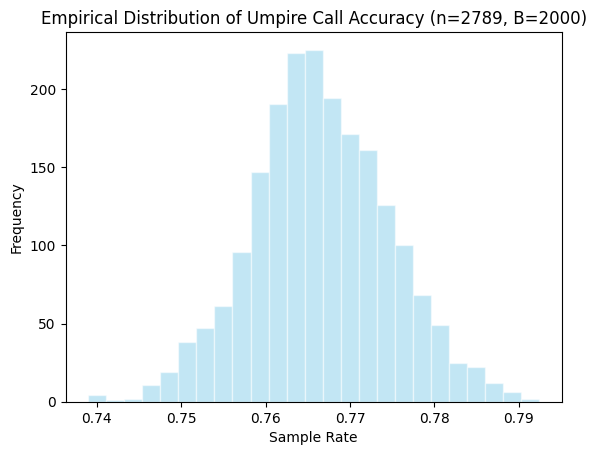

In [ ]:
# -----------------------------
# 6) 부트스트래핑 결과 시각화
# -----------------------------
plt.figure()
plt.hist(acc_hat, bins=25, color='skyblue', alpha=0.5, edgecolor='white')
plt.xlabel("Sample Rate")
plt.ylabel("Frequency")
plt.title(f"Empirical Distribution of Umpire Call Accuracy (n={n}, B={B})")
plt.show()

(부트스트래핑 실습 2)
- 이 실습에서는 전체 사용자가 매우 많은 온라인 서비스에서, 일부 사용자만을 표본으로 추출하여 알림 서비스를 활성화한 사용자의 비율을 추정하는 상황을 가정한다.
- 모집단은 총 10,000명의 사용자로 구성되어 있으며, 이 중 30%는 알림 서비스를 활성화한 사용자이다.
- 이제, 표본비율 $\hat{\theta}$에 대해 부트스트래핑으로 95% 신뢰구간을 구하고자 한다.
- 모집단(전체 사용자 10,000명)에서 비복원추출로 크기 $n=100$의 표본을 1번 뽑고, 표본비율 $\hat{\theta}$를 계산한다.
- 그 표본에 대하여, 크기 $n$의 부트스트랩을 $B=2000$번 수행하여 $\hat{\theta}^{*1},\dots,\hat{\theta}^{*B}$를 만든다.
- 부트스트랩 표본의 분위수(percentile)를 이용하여 95% 신뢰구간을
  $$ \left[\hat{\theta}^{*(0.025)},\ \hat{\theta}^{*(0.975)}\right] $$
  로 계산한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2026)

# (모집단 생성) 1: 기능 활성화 사용자, 0: 비활성 사용자
population = np.concatenate((np.ones(3000), np.zeros(7000)), axis=0)

# 크기 100의 표본 추출
n = 100
sample = np.random.choice(population, size=n, replace=False)
theta_hat = np.mean(sample) # 표본비율

# Bootstrap: 표본에서 복원추출로 표본비율 재계산
B = 2000
theta_star = np.empty(B)

for b in range(B):
    boot_sample = np.random.choice(sample, size=n, replace=True)
    theta_star[b] = np.mean(boot_sample)

# 부트스트랩 신뢰구간 계산
alpha = 0.05
ci_low, ci_high = np.quantile(theta_star, [alpha/2, 1 - alpha/2])

print(f"95% bootstrap percentile CI = [{ci_low:.4f}, {ci_high:.4f}]")

95% bootstrap percentile CI = [0.1600, 0.3300]


중심극한정리(CLT)를 이용한 $\theta$의 95% 신뢰구간은 다음과 같다.

In [ ]:
# 표본비율의 표준오차
se_clt = np.sqrt(theta_hat * (1 - theta_hat) / n)

# 95% 신뢰구간의 상한과 하한 계산
clt_ci_low = theta_hat - 1.96 * se_clt
clt_ci_high = theta_hat + 1.96 * se_clt

print(f"95% CLT-based CI = [{clt_ci_low:.4f}, {clt_ci_high:.4f}]")

95% CLT-based CI = [0.1563, 0.3237]


부트스트랩 표본의 히스토그램, 부트스트랩 표본과 중심극한정리(CLT)를 이용한 $\theta$의 95% 신뢰구간을 시각화하면 다음과 같다.

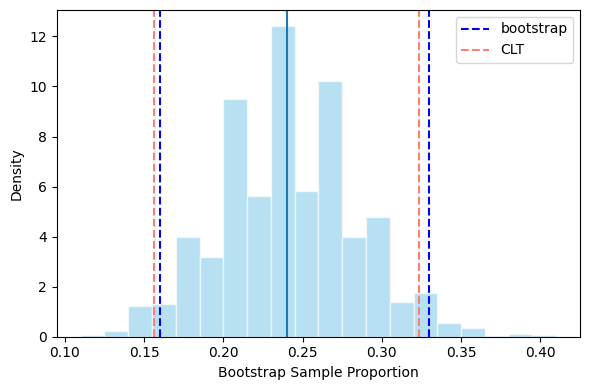

In [ ]:
# 시각화: bootstrap 분포 + bootstrap CI + CLT CI
plt.figure(figsize=(6, 4))
plt.hist(theta_star, bins=20, density=True, color="skyblue",alpha=0.6, edgecolor="white")

plt.axvline(ci_low, linestyle="--", color="blue", label="bootstrap")
plt.axvline(ci_high, linestyle="--", color="blue")
plt.axvline(clt_ci_low, linestyle="--", color="salmon", label="CLT")
plt.axvline(clt_ci_high, linestyle="--", color="salmon")
plt.axvline(theta_hat, linestyle="-")

plt.xlabel("Bootstrap Sample Proportion")
plt.ylabel("Density")
plt.tight_layout()
plt.legend()
plt.show()

# 3. EM Algorithm

- EM 알고리즘을 적용하는 예로, 앞 장에서 다루었던 가우시안 혼합분포를 이용한 군집분석을 소개한다.

- 두 개의 군집으로 이루어져 있는 데이터가 두 개의 구성원(성분 분포)을 갖는 가우시안 혼합분포를 따른다고 가정하자.
즉,
$$
X_1, \dots, X_n \overset{i.i.d.}{\sim} f(x \mid \theta)
$$
이며,
$$
f(x \mid \theta)
=
w_0 \frac{1}{\sqrt{2\pi\sigma_0^2}}
\exp\!\left(-\frac{1}{2\sigma_0^2}(x-\mu_0)^2\right)
+
(1-w_0)\frac{1}{\sqrt{2\pi\sigma_1^2}}
\exp\!\left(-\frac{1}{2\sigma_1^2}(x-\mu_1)^2\right).
$$
여기서 모수는
$
\theta = (\mu_0, \sigma_0^2, \mu_1, \sigma_1^2, w_0)
$
이다.

- 로그 가능도 함수는 다음과 같다.
$$
\ell(\theta)
=
\sum_{i=1}^n \log f(X_i \mid \theta)
$$
$$
=
\sum_{i=1}^n
\log\!\left(
w_0 \frac{1}{\sqrt{2\pi\sigma_0^2}}
\exp\!\left(-\frac{1}{2\sigma_0^2}(X_i-\mu_0)^2\right)
+
(1-w_0)\frac{1}{\sqrt{2\pi\sigma_1^2}}
\exp\!\left(-\frac{1}{2\sigma_1^2}(X_i-\mu_1)^2\right)
\right).
$$
로그함수 내부에 복잡한 함수 형태가 포함되어 있으므로,
로그 가능도를 최대화하는 $\theta$를 직접 구하기는 쉽지 않다.

- $i$번째 데이터 $X_i$가 어느 구성원으로부터 왔는지를 나타내는
잠재변수 $K_i$를 도입한다.
  - $K_i = 0$이면 $X_i \sim N(\mu_0, \sigma_0^2)$
  - $K_i = 1$이면 $X_i \sim N(\mu_1, \sigma_1^2)$
  - $K_i$는 $i$번째 데이터가 어느 군집에 속하는지 알려주는 label로 생각할 수 있다.
  - 잠재변수 $K_i$는
    
    $$
    P(K_i = 0) = w_0, \ P(K_i = 1) = 1 - w_0
    $$

    인 확률변수이다.
  - EM 알고리즘을 사용하면, $f(X_i \mid \theta)$ 대신 보다 단순한 형태의 $f(X_i, K_i \mid \theta)$를 이용한 최대화 문제로 바꿀 수 있다.


- 관측자료와 잠재변수를 각각
$$
Y_o = X = (X_1, \dots, X_n), \quad
Y_m = K = (K_1, \dots, K_n)
$$
라고 하자.

- 이때
$$
f(Y_o, Y_m \mid \theta)
=
f(X, K \mid \theta)
=
\prod_{i=1}^n f(X_i, K_i \mid \theta)
$$
이고,

$$
\log f(Y_o, Y_m \mid \theta)
=
\sum_{i=1}^n \log f(X_i, K_i \mid \theta)
$$

$$
=
-\frac{n}{2}\log(2\pi)
-\frac{1}{2}\sum_{i=1}^n \log(\sigma_{K_i}^2)
-\sum_{i=1}^n \frac{(X_i-\mu_{K_i})^2}{2\sigma_{K_i}^2}
+
\left(n-\sum_{i=1}^n K_i\right)\log(w_0)
+
\left(\sum_{i=1}^n K_i\right)\log(1-w_0).
$$

- 가우시안 혼합분포에서 E-step을 위한 $Q$ 함수는 다음과 같다.

$$
Q(\theta \mid \theta_{(r)})
=
\int \log f(Y_o, Y_m \mid \theta)
\, f(Y_m \mid Y_o, \theta_{(r)}) \, dY_m
$$

$$
=
\int
\left(
\sum_{i=1}^n \log f(X_i, K_i \mid \theta)
\right)
f(K \mid X, \theta_{(r)}) \, dK
$$

$$
=
\sum_{i=1}^n
\Big[
\log f(X_i, K_i=0 \mid \theta)\, P(K_i=0 \mid X_i, \theta_{(r)})
+
\log f(X_i, K_i=1 \mid \theta)\, P(K_i=1 \mid X_i, \theta_{(r)})
\Big].
$$


- 가우시안 혼합분포에서 M-step을 위해
$$
\frac{\partial Q}{\partial \mu_0}=0,\;
\frac{\partial Q}{\partial \mu_1}=0,\;
\frac{\partial Q}{\partial \sigma_0^2}=0,\;
\frac{\partial Q}{\partial \sigma_1^2}=0,\;
\frac{\partial Q}{\partial w_0}=0
$$
을 풀면 다음과 같은 업데이트 식을 얻는다.

$$
\mu_{j(r+1)}
=
\frac{\sum_{i=1}^n X_i \lambda_j(X_i,\theta_{(r)})}
{\sum_{i=1}^n \lambda_j(X_i,\theta_{(r)})},
\quad j=0,1,
$$

$$
\sigma_{j(r+1)}^2
=
\frac{\sum_{i=1}^n (X_i-\mu_{j(r+1)})^2
\lambda_j(X_i,\theta_{(r)})}
{\sum_{i=1}^n \lambda_j(X_i,\theta_{(r)})},
\quad j=0,1,
$$

$$
w_{0(r+1)}
=
\frac{1}{n}\sum_{i=1}^n \lambda_0(X_i,\theta_{(r)}).
$$

- 여기서
$
\lambda_j(X_i,\theta_{(r)})
=
P(K_i=j \mid X_i,\theta_{(r)}), \quad j=0,1
$
이다.


소개된 EM 알고리즘을 함수로 작성하면 다음과 같이 나타낼 수 있다.

In [ ]:
import numpy as np

def norm_pdf(x, mu, sigma2):
    # N(mu, sigma2)의 확률밀도함수 값
    return (1.0 / np.sqrt(2.0 * np.pi * sigma2)) * np.exp(-(x - mu) ** 2 / (2.0 * sigma2))

def run_em_algorithm(x, mu0, sigma0_2, mu1, sigma1_2, w0, max_iter=100, tol=1e-6):
    # 가우시안 혼합분포에 대한 EM algorithm
    x = np.asarray(x, dtype=float)
    n = x.size

    for r in range(max_iter):
        f0 = norm_pdf(x, mu0, sigma0_2)
        f1 = norm_pdf(x, mu1, sigma1_2)
        denom = w0 * f0 + (1.0 - w0) * f1

        lam0 = (w0 * f0) / denom  # lambda_0
        lam1 = ((1.0 - w0) * f1) / denom  # lambda_1

        # M-step
        mu0_new = np.sum(x * lam0) / np.sum(lam0)
        mu1_new = np.sum(x * lam1) / np.sum(lam1)

        sigma0_2_new = np.sum(((x - mu0_new) ** 2) * lam0) / np.sum(lam0)
        sigma1_2_new = np.sum(((x - mu1_new) ** 2) * lam1) / np.sum(lam1)

        w0_new = (1.0 / n) * np.sum(lam0)

        # 수렴 판정을 위한 기준 설정
        diff = max(
            abs(mu0_new - mu0),
            abs(mu1_new - mu1),
            abs(sigma0_2_new - sigma0_2),
            abs(sigma1_2_new - sigma1_2),
            abs(w0_new - w0)
        )

        # 파라미터 업데이트
        mu0, mu1 = mu0_new, mu1_new
        sigma0_2, sigma1_2 = sigma0_2_new, sigma1_2_new
        w0 = w0_new

        # 수렴 판정
        if diff < tol:
            break

    return {
        "mu0": mu0,
        "sigma0_2": sigma0_2,
        "mu1": mu1,
        "sigma1_2": sigma1_2,
        "w0": w0
    }

이 실습에서는 앞에서 소개한 가우시안 혼합분포 기반 EM 알고리즘을 모의실험을 통해 확인한다.

- 이 예제에서는 두 개의 정규분포 구성원을 갖는 가우시안 혼합분포에서 데이터를 생성한다.

- 전체 표본의 크기는
  $
  n = 400
  $
  으로 설정한다.

- 혼합분포의 실제 모수는 다음과 같이 주어진다.
  - 혼합 가중치:
    $$
    w_0 = 0.55
    $$
  - 성분 0:
    $$
    X \sim N(\mu_0, \sigma_0^2) = N(-2.0,1.0)
    $$
  - 성분 1:
    $$
    X \sim N(\mu_1, \sigma_1^2) = N(2.5,1.5)
    $$

- 각 관측치 $X_i$는 확률 $w_0$로 성분 0에서, 확률 $1-w_0$로 성분 1에서 생성되도록 한다.

- 생성된 데이터 $x_1,\dots,x_n$에 대해, 다음의 가우시안 혼합분포를 가정한다.
  $$
  f(x \mid \theta)
  =
  w_0 \phi(x;\mu_0,\sigma_0^2)
  +
  (1-w_0)\phi(x;\mu_1,\sigma_1^2)
  $$

- EM 알고리즘의 초기값은 다음과 같이 설정한다.
  - $\mu_0^{(0)} = -1.0,\quad \sigma_0^{2(0)} = 2.0$
  - $\mu_1^{(0)} = 1.0,\quad \sigma_1^{2(0)} = 2.0$
  - $w_0^{(0)} = 0.5$

- 위 초기값으로부터 EM 알고리즘을
  일정 횟수 반복하여
  $$
  \theta = (\mu_0,\sigma_0^2,\mu_1,\sigma_1^2,w_0)
  $$
  를 추정한다.

- 최종적으로,
  추정된 모수를 이용하여
  각 성분의 정규분포 확률밀도함수와
  혼합분포의 확률밀도함수를 함께 시각화하여
  EM 알고리즘의 결과를 확인한다.

In [ ]:
np.random.seed(2026)

n = 400
true_w0 = 0.55
true_mu0, true_sigma0_2 = -2.0, 1.0
true_mu1, true_sigma1_2 =  2.5, 1.5

k = (np.random.rand(n) < true_w0).astype(int)  # boolean으로 나오므로 k = 1이면 성분 0에서 추출되도록 만들기 위해 반전해서 사용
x = np.empty(n)
x[k == 1] = np.random.normal(loc=true_mu0, scale=np.sqrt(true_sigma0_2), size=(k == 1).sum())
x[k == 0] = np.random.normal(loc=true_mu1, scale=np.sqrt(true_sigma1_2), size=(k == 0).sum())

# 초기값 설정
init_mu0, init_sigma0_2 = -1.0, 2.0
init_mu1, init_sigma1_2 = 1.0, 2.0
init_w0 = 0.5

est = run_em_algorithm(
    x,
    mu0=init_mu0, sigma0_2=init_sigma0_2,
    mu1=init_mu1, sigma1_2=init_sigma1_2,
    w0=init_w0
)

print(est)

{'mu0': np.float64(-1.8527153227828397), 'sigma0_2': np.float64(1.0948063733096156), 'mu1': np.float64(2.701090663284152), 'sigma1_2': np.float64(1.5234864512616886), 'w0': np.float64(0.5481661202718178)}


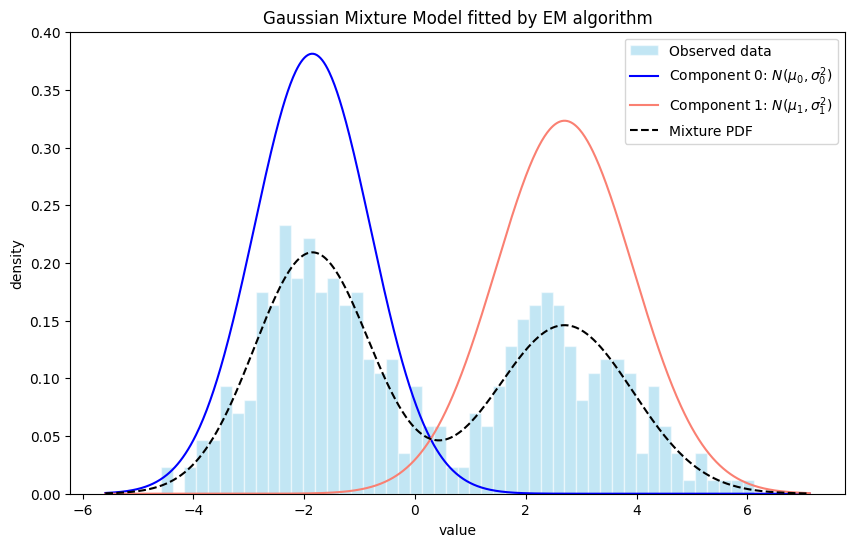

In [ ]:
# EM algorithm 실행 결과 저장
mu0_hat = est["mu0"]
mu1_hat = est["mu1"]
sigma0_2_hat = est["sigma0_2"]
sigma1_2_hat = est["sigma1_2"]
w0_hat = est["w0"]

# x축 grid 생성
x_grid = np.linspace(x.min() - 1.0, x.max() + 1.0, 800)

# 혼합분포 각 성분의 PDF
pdf0 = norm_pdf(x_grid, mu0_hat, sigma0_2_hat)
pdf1 = norm_pdf(x_grid, mu1_hat, sigma1_2_hat)

# 혼합분포 PDF
mixture_pdf = w0_hat * pdf0 + (1.0 - w0_hat) * pdf1

# 시각화
plt.figure(figsize=(10, 6))

# 전체 데이터 히스토그램
plt.hist(x, bins=50, density=True,
         alpha=0.5, color="skyblue", edgecolor="white",
         label="Observed data")

# 각 성분의 정규분포 PDF
plt.plot(
    x_grid, pdf0,
    color="blue",
    label=r"Component 0: $N(\mu_0, \sigma_0^2)$"
)

plt.plot(
    x_grid, pdf1,
    color="salmon",
    label=r"Component 1: $N(\mu_1, \sigma_1^2)$"
)

# 혼합분포 PDF
plt.plot(
    x_grid, mixture_pdf,
    color="black", linestyle="--",
    label="Mixture PDF"
)

plt.title("Gaussian Mixture Model fitted by EM algorithm")
plt.xlabel("value")
plt.ylabel("density")
plt.legend()
plt.show()